In [1]:
from ModularCirc.Models.NaghaviModel import NaghaviModel, NaghaviModelParameters, TEMPLATE_TIME_SETUP_DICT

from ModularCirc import BatchRunner

In [2]:
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
import numpy as np

In [3]:
br = BatchRunner('LHS', 0)


In [4]:
br.setup_sampler('parameters_02.json')

In [5]:
br.sample(10)

In [6]:
br.samples.columns

Index(['sas.r', 'sas.c', 'sas.l', 'sat.r', 'sat.c', 'sat.l', 'svn.r', 'svn.c',
       'pas.r', 'pas.c', 'pas.l', 'pat.r', 'pat.c', 'pat.l', 'pvn.r', 'pvn.c',
       'ao.CQ', 'mi.CQ', 'po.CQ', 'ti.CQ', 'lv.E_pas', 'lv.E_act', 'lv.v_ref',
       'lv.k_pas', 'la.E_pas', 'la.E_act', 'la.v_ref', 'la.k_pas', 'rv.E_pas',
       'rv.E_act', 'rv.v_ref', 'rv.k_pas', 'ra.E_pas', 'ra.E_act', 'ra.v_ref',
       'ra.k_pas', 'T', 'delay', 'tr', 'td0', 'tpww', 'v_tot', 'sas.v_ref',
       'sat.v_ref', 'svn.l', 'svn.v_ref', 'pas.v_ref', 'pat.v_ref', 'pvn.l',
       'pvn.v_ref', 'ao.RRA', 'mi.RRA', 'po.RRA', 'ti.RRA', 'lv.v', 'la.tpwb',
       'la.v', 'rv.v', 'ra.tpwb', 'ra.v'],
      dtype='object')

In [7]:
TEMPLATE_TIME_SETUP_DICT

{'name': 'TimeTest',
 'ncycles': 30,
 'tcycle': 1.0,
 'dt': 0.001,
 'export_min': 2}

In [8]:
map_ = {
    'delay' : ['la.delay', 'ra.delay'],
    'td0'   : ['lv.td0',   'rv.td0' ],
    'tr'    : ['lv.tr',    'rv.tr'  ],
    'tpww'  : ['la.tpww',  'ra.tpww'],
}
br.map_sample_timings(
    ref_time=1.,
    map=map_
    )

In [9]:
br.samples.columns

Index(['sas.r', 'sas.c', 'sas.l', 'sat.r', 'sat.c', 'sat.l', 'svn.r', 'svn.c',
       'pas.r', 'pas.c', 'pas.l', 'pat.r', 'pat.c', 'pat.l', 'pvn.r', 'pvn.c',
       'ao.CQ', 'mi.CQ', 'po.CQ', 'ti.CQ', 'lv.E_pas', 'lv.E_act', 'lv.v_ref',
       'lv.k_pas', 'la.E_pas', 'la.E_act', 'la.v_ref', 'la.k_pas', 'rv.E_pas',
       'rv.E_act', 'rv.v_ref', 'rv.k_pas', 'ra.E_pas', 'ra.E_act', 'ra.v_ref',
       'ra.k_pas', 'T', 'v_tot', 'sas.v_ref', 'sat.v_ref', 'svn.l',
       'svn.v_ref', 'pas.v_ref', 'pat.v_ref', 'pvn.l', 'pvn.v_ref', 'ao.RRA',
       'mi.RRA', 'po.RRA', 'ti.RRA', 'lv.v', 'la.tpwb', 'la.v', 'rv.v',
       'ra.tpwb', 'ra.v', 'la.delay', 'ra.delay', 'lv.td0', 'rv.td0', 'lv.tr',
       'rv.tr', 'la.tpww', 'ra.tpww'],
      dtype='object')

In [10]:
br._samples[['lv.td', 'rv.td']] = br._samples[['lv.tr', 'rv.tr']].values + br._samples[['lv.td0', 'rv.td0']].values
br._samples.drop(['lv.td0', 'rv.td0'], axis=1, inplace=True)

In [11]:
br.samples

,sas.r,sas.c,sas.l,sat.r,sat.c,sat.l,svn.r,svn.c,pas.r,pas.c,...,ra.tpwb,ra.v,la.delay,ra.delay,lv.tr,rv.tr,la.tpww,ra.tpww,lv.td,rv.td
0,0.001909,0.093842,0.000043,0.854232,0.829877,0.001545,0.092950,14.904532,0.001891,0.235169,...,0,20,0.146502,0.146502,0.253895,0.253895,0.078664,0.078664,0.398925,0.398925
1,0.004322,0.077297,0.000084,0.974741,1.243655,0.002444,0.059370,20.843079,0.002643,0.103691,...,0,20,0.181227,0.181227,0.339618,0.339618,0.067751,0.067751,0.500608,0.500608
2,0.002876,0.058124,0.000070,1.184270,2.061611,0.001746,0.068044,22.615751,0.001597,0.110454,...,0,20,0.099226,0.099226,0.129739,0.129739,0.095087,0.095087,0.284956,0.284956
3,0.002434,0.118193,0.000067,1.146149,2.306220,0.002116,0.083927,25.501024,0.002942,0.262568,...,0,20,0.110965,0.110965,0.198263,0.198263,0.061940,0.061940,0.293071,0.293071
4,0.003036,0.083914,0.000047,0.642544,1.389449,0.001499,0.105899,10.634712,0.002266,0.162749,...,0,20,0.144577,0.144577,0.236328,0.236328,0.050992,0.050992,0.313832,0.313832
5,0.001747,0.052895,0.000062,1.420331,1.905957,0.001973,0.060949,29.781784,0.001017,0.202213,...,0,20,0.085862,0.085862,0.157425,0.157425,0.071983,0.071983,0.246975,0.246975
6,0.003902,0.065750,0.000034,1.345779,1.619595,0.001005,0.099687,27.082233,0.002440,0.192199,...,0,20,0.054481,0.054481,0.152777,0.152777,0.023865,0.023865,0.224253,0.224253
7,0.003473,0.107310,0.000080,0.542087,1.010552,0.001050,0.075774,17.254194,0.001792,0.221193,...,0,20,0.115127,0.115127,0.149349,0.149349,0.072146,0.072146,0.244274,0.244274
8,0.002163,0.043545,0.000092,1.545321,2.238057,0.002259,0.047124,19.175608,0.001278,0.160673,...,0,20,0.159190,0.159190,0.267256,0.267256,0.065535,0.065535,0.340033,0.340033
9,0.003744,0.100586,0.000056,0.942239,1.448796,0.001332,0.038610,12.664619,0.002122,0.135598,...,0,20,0.071103,0.071103,0.086863,0.086863,0.026589,0.026589,0.135646,0.135646


In [12]:
br.map_vessel_volume()

In [13]:
br._samples[['sas.v', 'sat.v', 'svn.v', 'pas.v', 'pat.v', 'pvn.v']].describe().T

,count,mean,std,min,25%,50%,75%,max
sas.v,10.0,2.462019,1.808967,0.427541,1.256128,1.482445,3.707581,6.014230
sat.v,10.0,43.740897,23.509843,15.405378,22.740929,42.398316,58.179500,85.270591
svn.v,10.0,538.554958,265.233877,150.983351,373.527432,526.972139,629.044554,955.218009
pas.v,10.0,5.403984,4.211406,1.634441,2.524094,4.273193,6.350228,15.071750
pat.v,10.0,66.324564,41.786939,15.096940,41.349880,66.429557,78.961177,164.394456
pvn.v,10.0,575.177739,305.940953,105.481174,325.384094,586.076845,813.655787,1027.983099


In [14]:
br.setup_model(model=KorakianitisMixedModel, po=KorakianitisMixedModel_parameters, time_setup=TEMPLATE_TIME_SETUP_DICT)

In [15]:
br.setup_model(model=KorakianitisMixedModel, po=KorakianitisMixedModel_parameters, time_setup=TEMPLATE_TIME_SETUP_DICT)

In [16]:
import os

In [17]:
path = os.getcwd()
path

'/Users/syonis/project/comparative-gsa/sandbox'

In [18]:
os.system(f'mkdir -p {path+"/Outputs/Out_02"}')
test = br.run_batch(n_jobs=5, output_path=path+'/Outputs/Out_02')

100%|██████████| 10/10 [00:03<00:00,  2.95it/s]


In [19]:
ind = 0
test[ind].loc[ind]

,v_la,v_lv,v_sas,v_sat,v_svn,v_ra,v_rv,v_pas,v_pat,v_pvn,...,q_po,p_pas,p_pat,q_pas,p_pvn,q_pat,p_la,q_pvn,q_mi,T
time_ind,,,,,,,,,,,,,,,,,,,,,
0,280.545601,294.875577,13.557705,119.876306,573.136000,197.512673,206.557652,15.372234,82.135525,434.470870,...,-0.0,65.366839,65.336819,16.330351,27.086871,103.551350,27.027751,13.552783,-0.0,3.823966
1,280.555954,294.875577,13.548036,119.790818,573.047239,197.696589,206.557652,15.359742,82.068802,434.539732,...,-0.0,65.313718,65.283743,16.305816,27.091165,103.396070,27.032300,13.494122,-0.0,3.824732
2,280.566263,294.875577,13.538376,119.705409,572.958928,197.879969,206.557652,15.347268,82.002179,434.608520,...,-0.0,65.260677,65.230746,16.281325,27.095453,103.241016,27.036831,13.438609,-0.0,3.825497
3,280.576531,294.875577,13.528725,119.620078,572.871069,198.062811,206.557652,15.334813,81.935656,434.677230,...,-0.0,65.207715,65.177829,16.256883,27.099737,103.086187,27.041344,13.385990,-0.0,3.826263
4,280.586759,294.875577,13.519083,119.534825,572.783661,198.245114,206.557652,15.322377,81.869233,434.745861,...,-0.0,65.154833,65.124991,16.232491,27.104016,102.931584,27.045841,13.336024,-0.0,3.827028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,280.788423,295.071023,13.609643,120.335485,571.318889,196.315480,206.406919,15.449089,82.546135,436.199055,...,-0.0,65.693644,65.663450,16.423969,27.194614,104.143820,27.134675,13.740641,-0.0,4.585697
996,280.798915,295.071023,13.599912,120.249454,571.228594,196.501537,206.406919,15.436524,82.479031,436.268232,...,-0.0,65.640218,65.610070,16.399310,27.198927,103.987677,27.139303,13.668386,-0.0,4.586463
997,280.809352,295.071023,13.590190,120.163501,571.138745,196.687061,206.406919,15.423979,82.412027,436.337343,...,-0.0,65.586872,65.556770,16.374674,27.203236,103.831757,27.143908,13.600439,-0.0,4.587228


In [20]:
import matplotlib.pyplot as plt

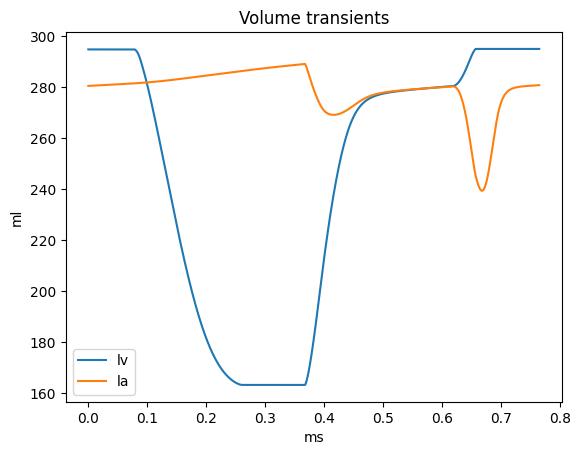

In [21]:
t = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]

fig, ax = plt.subplots()

ax.plot(t, test[ind].loc[ind]['v_lv'], label='lv')
ax.plot(t, test[ind].loc[ind]['v_la'], label='la')

ax.set_xlabel('ms')
ax.set_ylabel('ml')

ax.legend()
ax.set_title('Volume transients')

plt.show()

In [22]:
p_pat_raw = test[ind].loc[ind]['p_pat']

In [23]:
T     = test[ind].loc[ind]['T'].values.copy()

In [24]:
T_resample = np.linspace(T[0], T[-1], 100)

In [25]:
p_pat_resampled = np.interp(T_resample, T, p_pat_raw)
p_pat_resampled

array([ 65.33681901,  64.80487015,  64.28091824,  63.76484345,
        63.25652894,  62.75637873,  63.61900878,  66.84451978,
        70.3453995 ,  74.47774077,  78.95536625,  83.76097097,
        88.74548577,  93.80007344,  98.78503136, 103.57076008,
       108.03101495, 112.05852906, 115.57152779, 118.52317212,
       120.90654547, 122.75420128, 124.12852401, 125.10392359,
       125.74973878, 126.11968373, 126.25305481, 126.17953754,
       125.92271858, 125.50166202, 124.93181751, 124.22565711,
       123.39311056, 122.4418628 , 121.31793225, 119.97572889,
       118.77542502, 117.50693679, 116.31591128, 115.10549786,
       113.93526202, 112.77144761, 111.62913929, 110.50457422,
       109.39378289, 108.30413422, 107.22614266, 106.16891323,
       105.12356343, 104.09649065, 103.07837541, 102.07096074,
       101.06834841, 100.07230272,  99.08078286,  98.09563722,
        97.11681217,  96.14574605,  95.18319445,  94.23026068,
        93.28790995,  92.35688039,  91.43789192,  90.53

In [26]:
q_pat = test[ind].loc[ind]['q_pat'].values.copy()

In [27]:
q_pat

array([103.55134969, 103.39607017, 103.24101559, 103.08618672,
       102.93158377, 102.77720694, 102.62305634, 102.4691321 ,
       102.31543427, 102.16196289, 102.00871796, 101.85569944,
       101.70290728, 101.55034139, 101.39800166, 101.24588797,
       101.09400016, 100.94233809, 100.7909016 , 100.63969045,
       100.48870439, 100.33794326, 100.18740682, 100.03709483,
        99.8870071 ,  99.73714335,  99.58750335,  99.43808685,
        99.2888936 ,  99.1399233 ,  98.99117569,  98.84265048,
        98.69434741,  98.54626619,  98.39840651,  98.25076809,
        98.10335059,  97.95615373,  97.80917721,  97.66242071,
        97.51588393,  97.36956655,  97.22346831,  97.07758883,
        96.93192782,  96.78648497,  96.64125999,  96.49625256,
        96.35146238,  96.20688913,  96.06253249,  95.91856662,
        95.77735339,  95.6456071 ,  95.53384052,  95.45488533,
        95.42230333,  95.44894636,  95.54577291,  95.72098835,
        95.9795187 ,  96.32281901,  96.74899749,  97.25

In [28]:
CO = np.sum(q_pat) * (T[1] - T[0]) / (T[-1] - T[0]) * 60. / 1000. # L / min
CO

np.float64(10.539181777806574)